<a href="https://colab.research.google.com/github/fg0611/data-professionalization/blob/main/data-analysis/finance_basics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tradingview_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from tradingview_ta import TA_Handler, Interval, Exchange

tesla = TA_Handler(
    symbol="TSLA",
    screener="america",
    exchange="NASDAQ",
    interval=Interval.INTERVAL_1_DAY,
    # proxies={'http': 'http://example.com:8080'} # Uncomment to enable proxy (replace the URL).
)
print(tesla.get_analysis().summary)
# Example output: {"RECOMMENDATION": "BUY", "BUY": 8, "NEUTRAL": 6, "SELL": 3}

{'RECOMMENDATION': 'SELL', 'BUY': 4, 'SELL': 15, 'NEUTRAL': 7}


In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime 


In [4]:
!pip install -q yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.1 MB/s eta 0:00:00


In [5]:
import yfinance as yf

In [34]:
# we can get data by years, months and days
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max. Default is 1mo

# gld = yf.download('GLD', period='5y')
# eur = yf.download('EURUSD=X', period='5y')
df = yf.download('EURUSD=X GLD', period='5y')

[*********************100%***********************]  2 of 2 completed


In [64]:
# gld.head()
# eur.head()
# gld_close = gld["Close"]
# eur_close = eur["Close"]
# df.head()
# df["Close"]["GLD"]


In [44]:
df_close = df["Close"].dropna()
df_close.isnull().values.any() ## checking nulls or na
# df_close

False

In [110]:
df_close.iloc[:3]
# df_close.index

,EURUSD=X,GLD
Date,,
2018-01-08,1.203746,125.309998
2018-01-09,1.197046,124.730003
2018-01-10,1.192933,125.029999


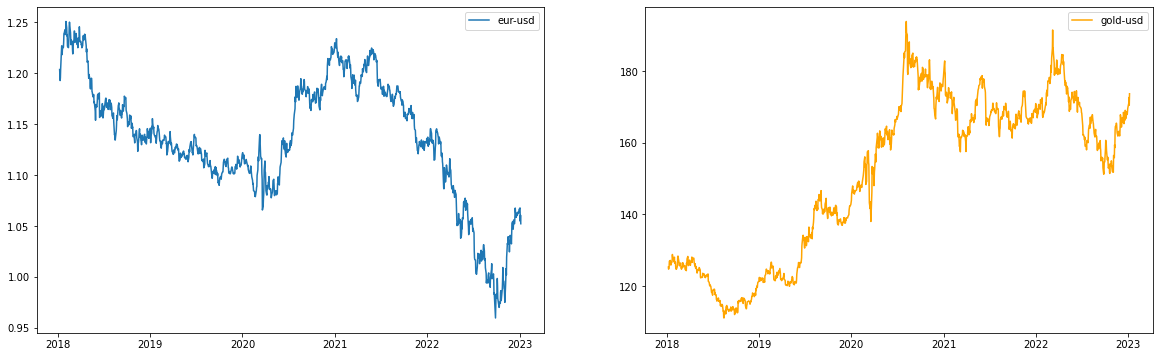

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
# ax.plot(gld.index, gld_close, label='gold')
# ax.plot(eur.index, eur_close, label='eur')


ax1.plot(df_close.index, df_close['EURUSD=X'], label='eur-usd')
ax2.plot(df_close.index, df_close['GLD'], label='gold-usd',color='orange')
ax1.legend()
ax2.legend()
# df_close.plot()
plt.show()

In [78]:
# variation in % between row values
daily_returns = df_close.pct_change()
daily_returns.columns = ["EUR_PCT_CHANGE", "GLD_PCT_CHANGE"]

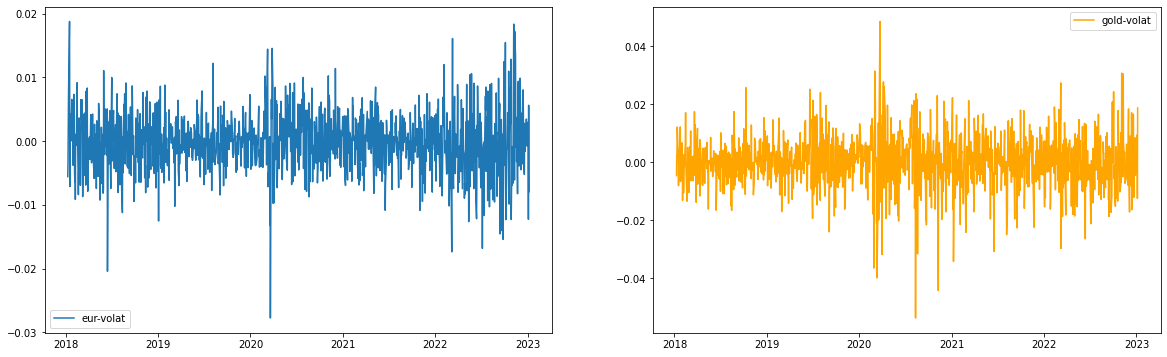

In [112]:
# daily_returns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
# ax.plot(gld.index, gld_close, label='gold')
# ax.plot(eur.index, eur_close, label='eur')

ax1.plot(daily_returns.index, daily_returns['EUR_PCT_CHANGE'], label='eur-volat')
ax2.plot(daily_returns.index, daily_returns['GLD_PCT_CHANGE'], label='gold-volat', color='orange')

ax1.legend()
ax2.legend()
# df_close.plot()
plt.show()

In [88]:
daily_returns_cum = (daily_returns+1).cumprod()
daily_returns_cum.iloc[:5]

,EUR_PCT_CHANGE,GLD_PCT_CHANGE
Date,,
2018-01-08,NaN,NaN
2018-01-09,0.994434,0.995372
2018-01-10,0.991017,0.997766
2018-01-11,0.993245,1.001037
2018-01-12,1.000385,1.013167


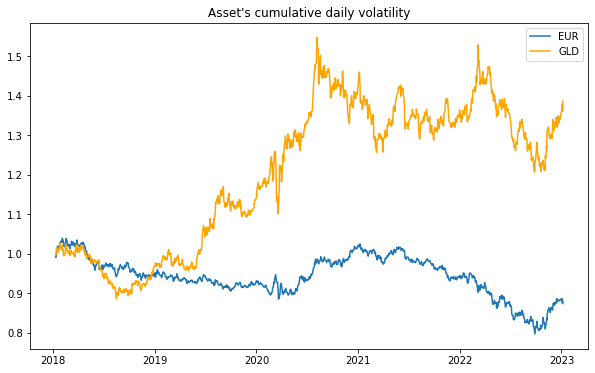

In [113]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Asset's cumulative daily volatility")

ax.plot(daily_returns_cum.iloc[:,0], label="EUR")

ax.plot(daily_returns_cum.iloc[:,1], label="GLD", color="orange")

ax.legend()
# daily_returns_cum.plot()